In [ ]:
# 코랩에서 그래프 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 실행하고 런타임 다시 시작

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

# 그래프에서 한글 깨짐 방지
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ubion_finance/Datasets/newnew_data.csv',index_col=0)
df_origin=pd.read_csv('/content/drive/MyDrive/ubion_finance/Datasets/newnew_data.csv',index_col=0)

In [ ]:
df_origin.index.dtype

dtype('O')

In [ ]:
df_origin

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,외환보유액,뉴스심리지수,원달러,...,CD,유가,G20,미장단기,거래량,구리,천연가스,은,금,종가
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.000000,112.100000,98.500000,10384.800000,105.100000,1853.700000,0.670000,261870733.000000,98.540000,936.800000,...,5.840000,26.816444,101.558900,1.030000,11548.000000,3.064000,7.850000,15.290000,860.000000,1000.000000
2008-02,3.900000,112.000000,98.400000,9246.100000,103.700000,1775.300000,0.530000,262364808.000000,97.880000,944.100000,...,5.460000,26.276930,101.286800,1.530000,13564.000000,3.273000,7.740000,16.916000,913.500000,897.970000
2008-03,3.200000,110.500000,98.400000,9434.400000,102.200000,1691.000000,0.310000,264245660.000000,88.120000,946.700000,...,5.170000,26.771666,100.974300,1.930000,9948.000000,3.928500,9.346000,20.180000,984.200000,873.820000
2008-04,0.400000,109.400000,98.900000,10121.700000,100.700000,1705.800000,0.140000,260482546.000000,103.730000,983.500000,...,5.390000,27.311699,100.601400,1.770000,13964.000000,3.806500,9.724000,16.935000,887.800000,965.780000
2008-05,-1.600000,106.100000,98.500000,9955.600000,98.600000,1758.200000,0.220000,258198958.000000,93.060000,1009.100000,...,5.360000,25.481760,100.145200,1.410000,16690.000000,3.694500,10.561000,16.205000,850.900000,1056.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.400000,92.700000,115.400000,10568.500000,85.200000,2336.400000,0.840000,423163664.000000,83.390000,1304.210000,...,4.030000,76.773430,98.935240,-0.720000,8411.000000,3.817500,6.738000,22.841000,1815.200000,1435.740000
2023-01,-15.400000,90.900000,111.200000,13969.700000,85.100000,2380.400000,0.450000,429967671.000000,93.790000,1269.020000,...,3.980000,78.254589,98.971380,-0.610000,10487.000000,3.795250,4.273500,24.328000,1835.800000,1343.910000
2023-02,-16.200000,91.100000,106.900000,14725.600000,84.600000,2391.300000,0.180000,425286150.000000,97.480000,1221.780000,...,3.590000,74.513809,99.024580,-0.700000,9732.000000,4.111000,2.468000,23.609000,1927.800000,1439.490000


In [ ]:
## 경제심리지수, 기계류내수출,수출입물가비율 ,장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

df['재고순환지표']+=25
df['재고순환지표']=np.log1p(df['재고순환지표']/df['재고순환지표'].shift(1))
df['건설수주액']=np.log1p(df['건설수주액']/df['건설수주액'].shift(1))
df['코스피']=np.log1p(df['코스피']/df['코스피'].shift(1))
df['원엔']=np.log1p(df['원엔']/df['원엔'].shift(1))
df['원위안']=np.log1p(df['원위안']/df['원위안'].shift(1))
df['CD']=np.log1p(df['CD']/df['CD'].shift(1))
df['유가']=np.log1p(df['유가']/df['유가'].shift(1))
df['미장단기']+=0.9
df['미장단기']=np.log1p(df['미장단기']/df['미장단기'].shift(1))
df['거래량']=np.log1p(df['거래량']/df['거래량'].shift(1))
df['구리']=np.log1p(df['구리']/df['구리'].shift(1))
df['은']=np.log1p(df['은']/df['은'].shift(1))
df['금']=np.log1p(df['금']/df['금'].shift(1))

df['종가']=np.log(df['종가']/df['종가'].shift(1))
df=df.dropna(axis=0)


In [ ]:
df.drop(['유가','은','원위안','외환보유액'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가'],
      dtype='object')

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

. 회귀 계수(coef)는 각 라그(lag) 변수에 대한 계수를 의미하며, std err은 계수의 표준 오차(standard error)를 나타냅니다. P>|z|는 계수의 유의성을 검정한 결과로, 유의수준(significance level) 0.05를 기준으로 계수가 통계적으로 유의미한지를 판단할 수 있습니다. [0.025 0.975] 구간은 계수의 95% 신뢰구간(confidence interval)을 의미합니다.

재고순환지표: 과거 시점의 자기 회귀 계수(L1.재고순환지표)는 유의미한 음의 관계를 가지고 있습니다. 이는 재고순환지표가 이전 시점의 재고순환지표 값에 의해 음의 영향을 받는다는 것을 나타냅니다.

이는 통계 모델의 오차 공분산 행렬을 나타내는 결과입니다. 각 변수와 오차 항목 간의 상관 관계와 오차의 분산을 보여줍니다. 각 항목의 계수, 표준 오차, z 값, P 값, 95% 신뢰 구간 등이 표시되어 있습니다. 이 결과를 기반으로 변수 간의 관계와 통계적 유의성을 평가할 수 있습니다.

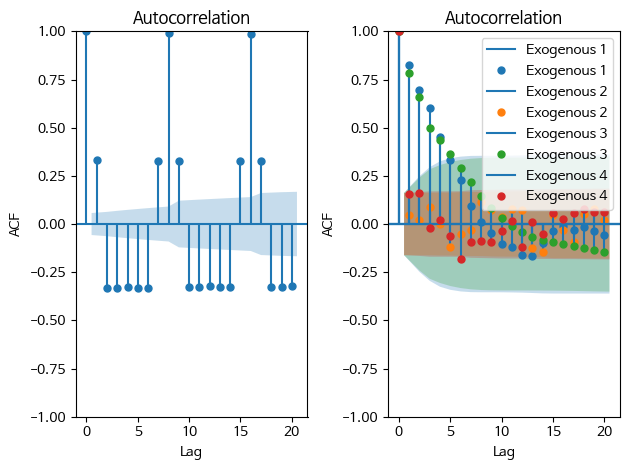

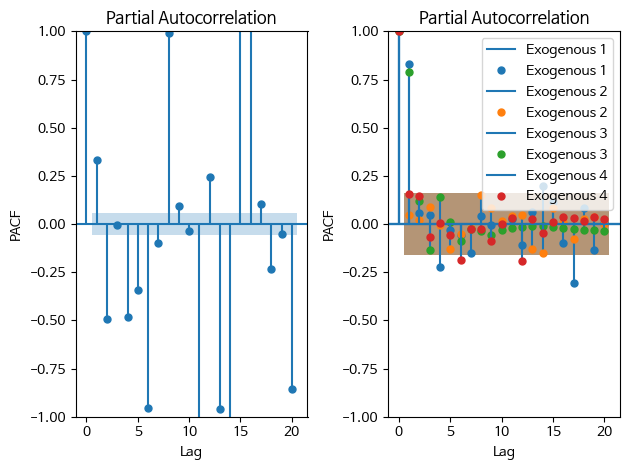

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 그래프에서 한글 깨짐 방지
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
data =df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','CD','거래량','종가']].values.flatten()
exog= df.iloc[:147][['원달러', '원엔', 'G20', '구리']].values

# 내생 변수와 외생 변수를 함께 고려하여 ACF와 PACF를 그리는 함수 정의
def plot_acf_pacf(data, exog, lags):
    # 내생 변수의 ACF 그래프
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.xlabel('Lag')
    plt.ylabel('ACF')

    # 외생 변수의 ACF 그래프
    plt.subplot(122)
    for i in range(exog.shape[1]):
        plot_acf(exog[:, i], lags=lags, ax=plt.gca(), label=f'Exogenous {i+1}')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 내생 변수의 PACF 그래프
    plt.subplot(121)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.xlabel('Lag')
    plt.ylabel('PACF')

    # 외생 변수의 PACF 그래프
    plt.subplot(122)
    for i in range(exog.shape[1]):
        plot_pacf(exog[:, i], lags=lags, ax=plt.gca(), label=f'Exogenous {i+1}')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.legend()

    plt.tight_layout()
    plt.show()


# ACF와 PACF를 그리기
max_lag = 20  # 최대 시차(lag)
plot_acf_pacf(data, exog, lags=max_lag)

The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.

In [ ]:
# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','CD','거래량','종가']]
train_exog = df.iloc[:147][['원달러', '원엔', 'G20', '구리']]
train = pd.DataFrame(train_data)
train_exog = pd.DataFrame(train_exog)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','CD','거래량','종가']]
test_exog = df.iloc[147:][['원달러', '원엔', 'G20', '구리']]
test = pd.DataFrame(test_data)
test_exog = pd.DataFrame(test_exog)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

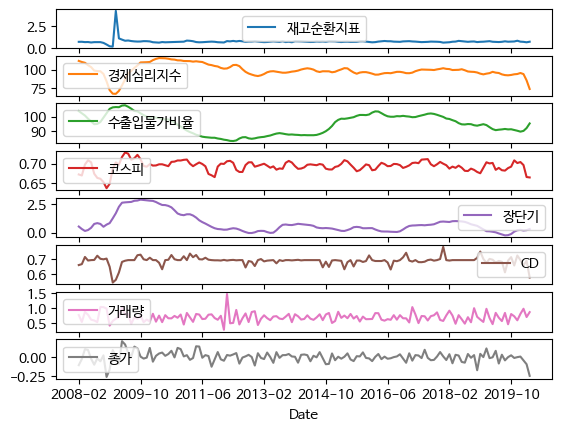

In [ ]:
train.plot(subplots=True)
plt.show()

In [ ]:
model = VARMAX(train, exog=train_exog, order=(5,2))
model_fit = model.fit(disp=False, maxiter=1000 )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import joblib

In [ ]:
#joblib.dump(model_fit, 'varmax_ree.pkl')

['varmax_ree.pkl']

In [ ]:
model_fit1 = joblib.load("varmax_ree.pkl")

In [ ]:
forecast = model_fit1.forecast(steps=36, exog=pd.concat([train_exog.iloc[-2:],test_exog.iloc[:34]]))
forecast['종가']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


2020-05-01    0.024156
2020-06-01   -0.180288
2020-07-01   -0.182405
2020-08-01   -0.045353
2020-09-01    0.123578
2020-10-01    0.074702
2020-11-01    0.015896
2020-12-01   -0.023329
2021-01-01    0.060303
2021-02-01    0.007630
2021-03-01    0.011752
2021-04-01   -0.030904
2021-05-01    0.024158
2021-06-01    0.035916
2021-07-01    0.000238
2021-08-01    0.013081
2021-09-01    0.023131
2021-10-01    0.002620
2021-11-01    0.029589
2021-12-01    0.019634
2022-01-01    0.060371
2022-02-01    0.022869
2022-03-01    0.020261
2022-04-01    0.012550
2022-05-01    0.027914
2022-06-01    0.051660
2022-07-01    0.050083
2022-08-01    0.027607
2022-09-01    0.009261
2022-10-01    0.000529
2022-11-01    0.050517
2022-12-01    0.060618
2023-01-01    0.064375
2023-02-01    0.029047
2023-03-01    0.000753
2023-04-01    0.020837
Freq: MS, Name: 종가, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(test['종가'],forecast['종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(test['종가'], forecast['종가'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.065841
MSE: 0.007355
RMSE: 0.085760


In [ ]:
# forecast = model_fit1.forecast(steps=1, exog=train_exog.iloc[-2])
# forecast

In [ ]:
test.index.dtype

dtype('O')

In [ ]:
# test = test.reset_index()
#test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m')
#test = test.set_index('Date')

In [ ]:
forecast.index = forecast.index.to_period('M')

In [ ]:
forecast.index.dtype

period[M]

In [ ]:
forecast.index = forecast.index.astype(str).str.replace("'", "")

In [ ]:
# forecast.index = forecast.index.astype('O')

In [ ]:
forecast.index.dtype

dtype('O')

In [ ]:
forecast.index

Index(['2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
       '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10',
       '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04',
       '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10',
       '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04'],
      dtype='object')

In [ ]:
test.index

Index(['2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
       '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10',
       '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04',
       '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10',
       '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04'],
      dtype='object', name='Date')

In [ ]:
show=pd.concat([forecast['종가'],test['종가']], axis=1, keys=['예측', '실제'])
show

,예측,실제
2020-05,0.024156,0.116203
2020-06,-0.180288,0.098670
2020-07,-0.182405,-0.033584
2020-08,-0.045353,0.081749
2020-09,0.123578,0.160504
2020-10,0.074702,0.030546
2020-11,0.015896,-0.035161
2020-12,-0.023329,0.096859
2021-01,0.060303,0.102901
2021-02,0.007630,0.124357


In [ ]:
# df_origin = df_origin.reset_index()
# df_origin['Date'] = pd.to_datetime(df_origin['Date'], format='%Y-%m')
# df_origin = df_origin.set_index('Date')

In [ ]:
df_origin.index.dtype

dtype('O')

In [ ]:
a=df_origin[148:][['종가']]
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
b=df_origin[147:-1]['종가'].values * np.exp(show['예측'].values)
show['예측종가']=b
show.rename(columns={0 : '예측종가'},inplace=True)
show

,예측,실제,실제종가,예측종가
2020-05,0.024156,0.116203,1047.710000,955.576811
2020-06,-0.180288,0.098670,1156.360000,874.869275
2020-07,-0.182405,-0.033584,1118.170000,963.552831
2020-08,-0.045353,0.081749,1213.420000,1068.590290
2020-09,0.123578,0.160504,1424.680000,1373.030658
2020-10,0.074702,0.030546,1468.870000,1535.181839
2020-11,0.015896,-0.035161,1418.120000,1492.405219
2020-12,-0.023329,0.096859,1562.350000,1385.419839
2021-01,0.060303,0.102901,1731.680000,1659.463306
2021-02,0.007630,0.124357,1960.990000,1744.942919


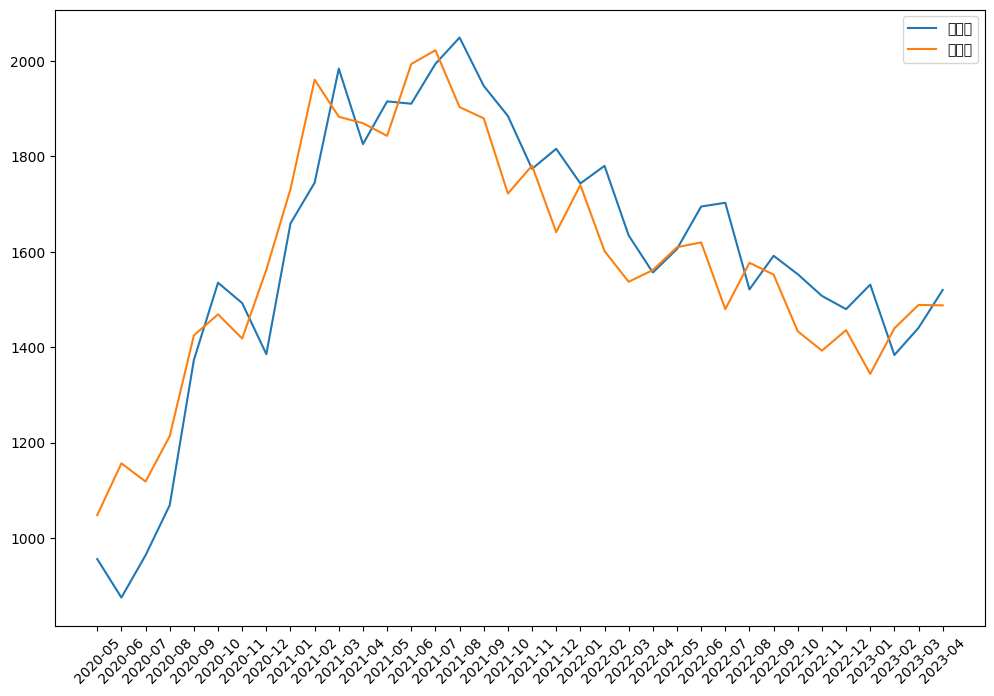

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(test.index, show['예측종가'],label='예측값')
plt.plot(test.index, show['실제종가'],label='실제값')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 97.265188
MSE: 14140.665578
RMSE: 118.914531


In [ ]:
df_origin_gr=df_origin.iloc[:149][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','CD','거래량','종가','미장단기']]

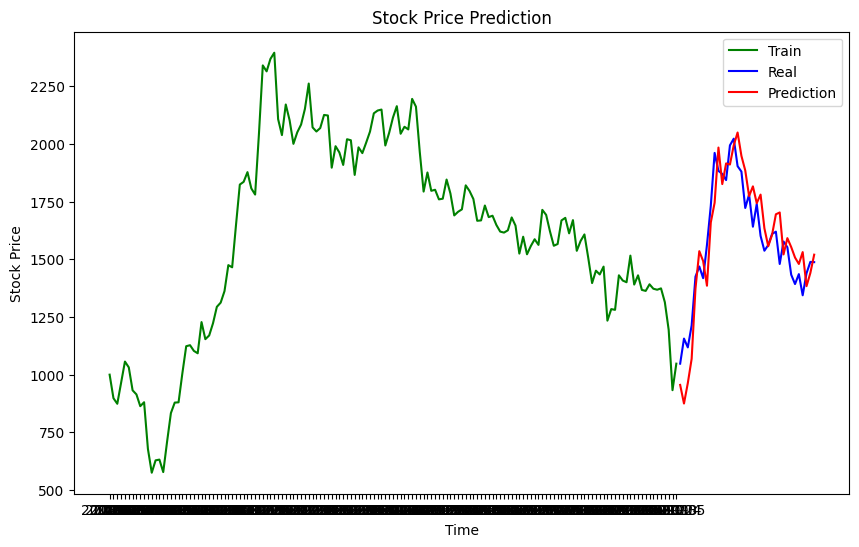

In [ ]:
plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(df_origin_gr['종가'], color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(df_origin_gr['종가']), len(df_origin_gr['종가'])+len(show['실제종가'])), show['실제종가'], color='blue', label='Real')
plt.plot(range(len(df_origin_gr['종가']), len(df_origin_gr['종가'])+len(show['실제종가'])), show['예측종가'], color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np

# 관련 데이터 프레임을 NumPy 배열로 변환
train_data = df.iloc[:147][['재고순환지표', '경제심리지수', '수출입물가비율', '코스피', '장단기', 'CD', '거래량', '종가']].values
train_exog = df.iloc[:147][['원달러', '원엔', 'G20', '구리']].values
test_data = df.iloc[147:][['재고순환지표', '경제심리지수', '수출입물가비율', '코스피', '장단기', 'CD', '거래량', '종가']].values
test_exog = df.iloc[147:][['원달러', '원엔', 'G20','구리']].values

# 예측값을 저장할 빈 리스트 초기화
pred = []

# VARMAX 모델 초기화 및 학습
model_varmax = VARMAX(endog=train_data, exog=train_exog, order=(5, 2))
model_fit = model_varmax.fit(disp=False)

for t in range(len(test_data)):
    # 한 단계 예측
    forecast = model_fit.forecast(steps=1, exog=[train_exog[-2]])

    # 예측값을 리스트에 추가
    pred.append(forecast[0])

    # 새로운 데이터로 VARMAX 모델 재학습
    train_data = np.concatenate([train_data, [test_data[t]]])
    train_exog = np.concatenate([train_exog, [test_exog[t]]])
    model_varmax = VARMAX(endog=train_data, exog=train_exog, order=(5, 2))
    model_fit = model_varmax.fit(disp=False)

    print(f'{t+1}번째')

# 예측값 리스트를 DataFrame으로 변환
pred = pd.DataFrame(pred, columns=train.columns)
pred.reset_index(drop=True, inplace=True)
pred.to_csv('pred.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


KeyboardInterrupt: ignored